In [1]:
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie', None, 'Eve'],
    'Age': [25, 30, None, 22, 29],
    'City': ['Delhi', 'Mumbai', 'Delhi', 'Chennai', ''],
    'Salary': [50000, 60000, None, 45000, 52000]
}

df = pd.DataFrame(data)
print(df)


      Name   Age     City   Salary
0    Alice  25.0    Delhi  50000.0
1      Bob  30.0   Mumbai  60000.0
2  Charlie   NaN    Delhi      NaN
3     None  22.0  Chennai  45000.0
4      Eve  29.0           52000.0


In [2]:
df_cleaned = df.dropna()

In [4]:
print(df_cleaned)

    Name   Age    City   Salary
0  Alice  25.0   Delhi  50000.0
1    Bob  30.0  Mumbai  60000.0
4    Eve  29.0          52000.0


In [9]:
print(df)

      Name   Age     City   Salary
0    Alice  25.0    Delhi  50000.0
1      Bob  30.0   Mumbai  60000.0
2  Charlie  26.5    Delhi      0.0
3  Unknown  22.0  Chennai  45000.0
4      Eve  29.0           52000.0


In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(0)
df['Name'] = df['Name'].fillna('Unknown')
print(df)

      Name   Age     City   Salary
0    Alice  25.0    Delhi  50000.0
1      Bob  30.0   Mumbai  60000.0
2  Charlie  26.5    Delhi      0.0
3  Unknown  22.0  Chennai  45000.0
4      Eve  29.0           52000.0


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on both training and test sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(train_accuracy*100)
# Print accuracies
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")


97.5
Training Accuracy: 97.50%
Testing Accuracy: 100.00%


In [21]:
# Unknown flower(s): each list inside should have 4 values
unknown_input = [[5.1, 3.5, 1.4, 0.2]]  # Looks like Setosa
                   # Looks like Versicolor

# Predict
predictions = model.predict(unknown_input)

if predictions==0:
    print("Iris Setosa")


Iris Setosa


Logistic Regression Training score: 97.5
Logistic Regression Testing score: 100.0
Decision Tree Training score: 100.0
Decision Tree Testing score: 100.0
Random Forest Training score: 100.0
Random Forest Testing score: 100.0
KNN Training score: 96.66666666666667
KNN Testing score: 100.0
SVM Training score: 97.5
SVM Testing score: 100.0


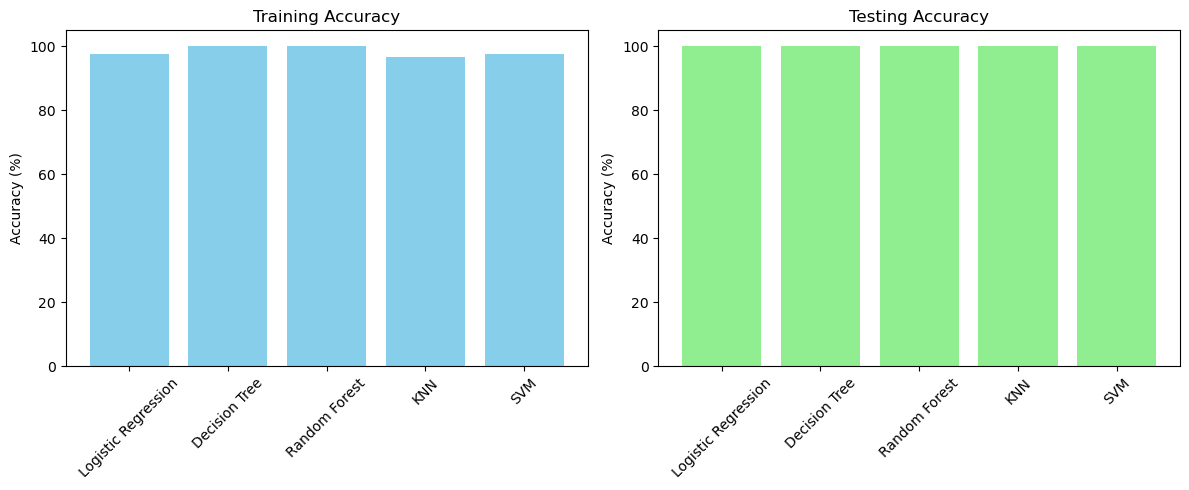

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

# Train each model and store accuracies
for name, model in models.items():
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    
    train_accuracies[name] = train_acc * 100
    print(name,"Training score:",train_accuracies[name])
    test_accuracies[name] = test_acc * 100
    print(name,"Testing score:",test_accuracies[name])

# Plotting the results
plt.figure(figsize=(12, 5))

# Training accuracy bar chart
plt.subplot(1, 2, 1)
plt.bar(train_accuracies.keys(), train_accuracies.values(), color='skyblue')
plt.title("Training Accuracy")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)

# Testing accuracy bar chart
plt.subplot(1, 2, 2)
plt.bar(test_accuracies.keys(), test_accuracies.values(), color='lightgreen')
plt.title("Testing Accuracy")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict unknown sample(s)
unknown_input = [[5.1, 3.5, 1.4, 0.2],     # Likely Setosa
                 [6.0, 2.9, 4.5, 1.5],     # Likely Versicolor
                 [6.3, 3.3, 6.0, 2.5]]     # Likely Virginica

predictions = model.predict(unknown_input)

# Print results using if-elif-else
for i, pred in enumerate(predictions):
    print(f"Sample {i+1} → ", end="")
    if pred == 0:
        print("Iris Setosa")
    elif pred == 1:
        print("Iris Versicolor")
    else:
        print("Iris Virginica")


Sample 1 → Iris Setosa
Sample 2 → Iris Versicolor
Sample 3 → Iris Virginica
